# TAREA 3

# Punto 1

Las partes de demostraciones estan en el pdf en la caperta de Tarea_3

<IPython.core.display.Javascript object>


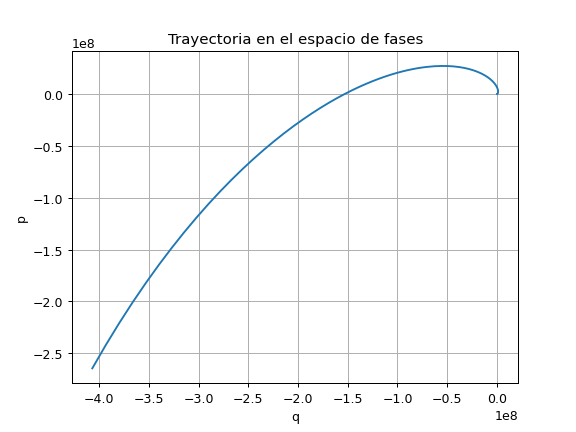

Matriz de estabilidad:
[[ 2 -1]
 [ 1  2]]
Valores propios:
[2.+1.j 2.-1.j]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definimos el sistema de ecuaciones
def sistema(t, y):
    x, y = y
    dxdt = 2*x - y
    dydt = x + 2*y
    return [dxdt, dydt]

# Condiciones iniciales
y0 = [1, 0]

# Intervalo de tiempo
t = np.linspace(0, 10, 400)

# Solución numérica del sistema
sol = solve_ivp(sistema, [t[0], t[-1]], y0, t_eval=t)

# Cálculo de la matriz de estabilidad
A = np.array([[2, -1], [1, 2]])

# Cálculo de valores y vectores propios
valores_propios, vectores_propios = np.linalg.eig(A)

# Dibujo de la trayectoria sobre el espacio de fases
plt.plot(sol.y[0], sol.y[1])
plt.title('Trayectoria en el espacio de fases')
plt.xlabel('q')
plt.ylabel('p')
plt.grid(True)
plt.show()

print(f"Matriz de estabilidad:\n{A}")
print(f"Valores propios:\n{valores_propios}")


## Punto 2

<IPython.core.display.Javascript object>


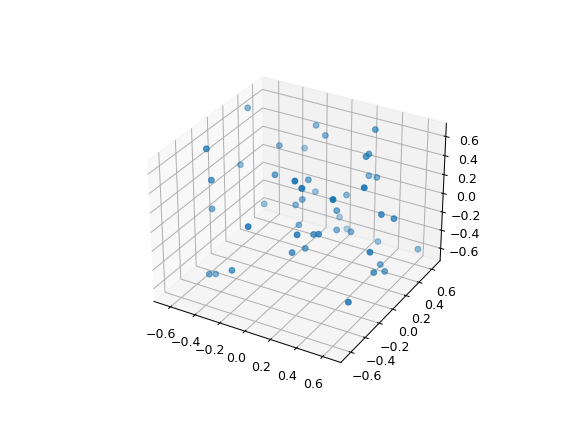

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

num_particulas = 50  
radio_particula = 0.1 / np.sqrt(50)  
dimensiones_volumen = (10 / np.sqrt(50), 10 / np.sqrt(50), 10 / np.sqrt(50)) 
paso_tiempo = 0.01  
tiempo_total = 20 

posiciones = np.random.uniform(low=(-dimensiones_volumen[0]/2, -dimensiones_volumen[1]/2, -dimensiones_volumen[2]/2),
                              high=(dimensiones_volumen[0]/2, dimensiones_volumen[1]/2, dimensiones_volumen[2]/2),
                              size=(num_particulas, 3))
velocidades = np.random.randn(num_particulas, 3)


def integrar():
    global posiciones, velocidades
   
    posiciones += velocidades * paso_tiempo
  
    for i in range(3):
        mascara = np.abs(posiciones[:, i]) + radio_particula > dimensiones_volumen[i] / 2
        velocidades[mascara, i] *= -1

figura = plt.figure()
ejes = figura.add_subplot(111, projection='3d')
ejes.set_xlim(-dimensiones_volumen[0]/2, dimensiones_volumen[0]/2)
ejes.set_ylim(-dimensiones_volumen[1]/2, dimensiones_volumen[1]/2)
ejes.set_zlim(-dimensiones_volumen[2]/2, dimensiones_volumen[2]/2)

def animar(frame):
    ejes.clear()
    ejes.set_xlim(-dimensiones_volumen[0]/2, dimensiones_volumen[0]/2)
    ejes.set_ylim(-dimensiones_volumen[1]/2, dimensiones_volumen[1]/2)
    ejes.set_zlim(-dimensiones_volumen[2]/2, dimensiones_volumen[2]/2)
    integrar()  
    ejes.scatter(posiciones[:, 0], posiciones[:, 1], posiciones[:, 2], marker='o')
animacion = FuncAnimation(figura, animar, frames=int(tiempo_total / paso_tiempo), interval=paso_tiempo*1000)

plt.show()


## Punto 3

<IPython.core.display.Javascript object>


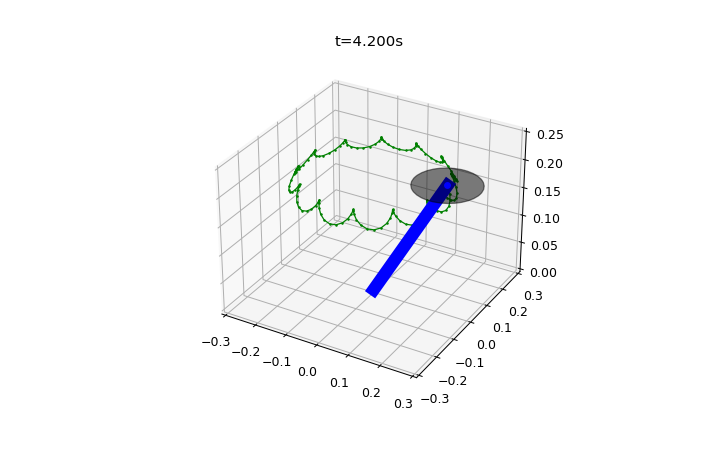

In [11]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import art3d

def system_equations(state, t, m, r, d, g, psidot, theta0):
    phi, psi, theta, omega = state
    
    Iz = 0.5 * m * r**2
    I0 = 0.25 * m * r**2 + m * d**2
    
    dphi = (Iz * psidot * (np.cos(theta0) - np.cos(theta))) / (I0 * np.sin(theta)**2 + Iz * np.cos(theta)**2)
    dpsi = psidot
    dtheta = omega
    domega = 1 / I0 * (dphi**2 * (np.sin(theta) * np.cos(theta)) * (I0 - Iz) - dphi * dpsi * Iz * np.sin(theta) + m * g * d * np.sin(theta))
  
    return [dphi, dpsi, dtheta, domega]

m = 0.1
r = 0.1
d = 0.3
g = 9.81
psidot = 400
theta0 = 0.25 * np.pi
t = np.linspace(0, 8, 10000)
initial_state = [0, 0, theta0, 0]

solution = odeint(system_equations, initial_state, t, args=(m, r, d, g, psidot, theta0))
phi = solution[:, 0]
psi = solution[:, 1]
theta = solution[:, 2]
omega = solution[:, 3]

position = np.zeros([len(t), 3])

for i in range(len(t)):
    position[i, 0] = d * np.sin(theta[i]) * np.cos(phi[i])
    position[i, 1] = d * np.sin(theta[i]) * np.sin(phi[i])
    position[i, 2] = d * np.cos(theta[i])

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection='3d')

def init():
    ax.clear()
    ax.set_xlim(-0.3, 0.3)
    ax.set_ylim(-0.3, 0.3)
    ax.set_zlim(0, 0.25)

def update_plot(i):
    init()
    scale = 35
    x = position[::scale][i, 0]
    y = position[::scale][i, 1]
    z = position[::scale][i, 2]
    
    history_x = position[::scale][:i, 0]
    history_y = position[::scale][:i, 1]
    history_z = position[::scale][:i, 2]
    if i <= 1000:
        ax.plot(history_x, history_y, history_z, '.-', lw=1, ms=2, c="g")
    else:
        ax.plot(history_x[i-30:i], history_y[i-30:i], history_z[i-30:i], '.-', lw=1, ms=2, c="g")
    ax.plot([0, x], [0, y], [0, z], 'o-', lw=10, c="b")  
    p = Circle((x, y), r, color='black', alpha=0.5)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=z, zdir="z")
    ax.scatter(x, y, z, c="b")  
    ax.set_title('t={:.3f}s'.format(t[::scale][i]))

animation = anim.FuncAnimation(fig, update_plot, frames=len(t[::35]), init_func=init)

plt.show()


## Punto 4

C:\Users\Samuel Eduardo\AppData\Local\Temp\ipykernel_1924\2086047409.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(1, len(t))):


  0%|          | 0/999999 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


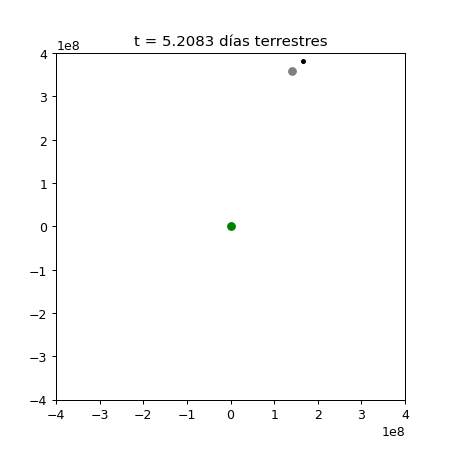

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm_notebook as tqdm 

G = 6.67e-11
mT = 5.9736e24
mL = 0.07349e24
dTL = 3.844e8
w = 2.6617e-6
rT = 6.3781e6
rL = 1.7374e6
t = np.arange(0, 1e6, 1)

def Sistema(R, t, G, mT, mL, dTL, w): 
    
    r, phi, p_r, p_phi = R
    Delta = G * mT / dTL**3
    mu = mL / mT
    r_prima = np.sqrt(1 + r**2 - 2 * r * np.cos(phi - w * t))
    
    drdt = p_r
    dphidt = p_phi / r**2 
    dp_rdt = (p_phi**2 / r**3) - Delta * (1 / r**2 + (mu / r_prima**3) * (r - np.cos(phi - w * t)))
    dp_phidt = -(Delta * mu * r / r_prima**3) * np.sin(phi - w * t)
    
    return np.array([drdt, dphidt, dp_rdt, dp_phidt])

v_escape = 11.1e3 / dTL 
phi_0 = 340 * np.pi / 180
theta_0 = 25 * np.pi / 180
r0 = 6.371e6 / dTL

R0 = [r0, phi_0, v_escape * np.cos(theta_0 - phi_0), v_escape * r0 * np.sin(theta_0 - phi_0)]

def IntegradorRungeKutta4(f, R0, t, G, mT, mL, dTL, w): 
    
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    
    p_r = np.zeros_like(t)
    p_phi = np.zeros_like(t)
    
    r[0] = R0[0]
    phi[0] = R0[1]
    p_r[0] = R0[2]
    p_phi[0] = R0[3]

    for i in tqdm(range(1, len(t))):  
        
        R = np.array([r[i-1], phi[i-1], p_r[i-1], p_phi[i-1]])
        
        K1 = f(R, t[i-1], G, mT, mL, dTL, w)
        
        R = np.array([r[i-1] + 0.5 * h * K1[0], phi[i-1] + 0.5 * h * K1[1],
                      p_r[i-1] + 0.5 * h * K1[2], p_phi[i-1] + 0.5 * h * K1[3]])
        
        K2 = f(R, t[i-1] + 0.5 * h, G, mT, mL, dTL, w)
        
        R = np.array([r[i-1] + 0.5 * h * K2[0], phi[i-1] + 0.5 * h * K2[1],
                      p_r[i-1] + 0.5 * h * K2[2], p_phi[i-1] + 0.5 * h * K2[3]])
        
        K3 = f(R, t[i-1] + 0.5 * h, G, mT, mL, dTL, w)
        
        R = np.array([r[i-1] + h * K3[0], phi[i-1] + h * K3[1],
                      p_r[i-1] + h * K3[2], p_phi[i-1] + h * K3[3]])
        
        K4 = f(R, t[i-1] + h, G, mT, mL, dTL, w)
        
        r[i] = r[i-1] + (1/6) * h * (K1[0] + 2 * K2[0] + 2 * K3[0] + K4[0])
        phi[i] = phi[i-1] + (1/6) * h * (K1[1] + 2 * K2[1] + 2 * K3[1] + K4[1])
        
        p_r[i] = p_r[i-1] + (1/6) * h * (K1[2] + 2 * K2[2] + 2 * K3[2] + K4[2])
        p_phi[i] = p_phi[i-1] + (1/6) * h * (K1[3] + 2 * K2[3] + 2 * K3[3] + K4[3])
        
    return r, phi, p_r, p_phi

solucion = IntegradorRungeKutta4(Sistema, R0, t, G, mT, mL, dTL, w)  
r1 = solucion[0]
phi1 = solucion[1]
p_r1 = solucion[2]
p_phi1 = solucion[3]
xL1 = dTL * np.cos(w * t)
yL1 = dTL * np.sin(w * t)

xT1 = r1 * np.cos(phi1) * dTL
yT1 = r1 * np.sin(phi1) * dTL

fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_subplot()

escala = 10000  

t1 = t[::escala] * (1/60) * (1/60) * (1/24)

def Inicializar():  
    
    ax1.clear()
    ax1.set_xlim(-4e8, 4e8)
    ax1.set_ylim(-4e8, 4e8)
    
def Actualizar(i):  
    Inicializar()
    ax1.scatter(xL1[::escala][i], yL1[::escala][i], color='gray' )
    ax1.scatter(0, 0, color="g")
    ax1.set_title("t = {:.4f} días terrestres".format(t1[i]))
    ax1.scatter(xT1[::escala][i], yT1[::escala][i], marker=".", color="black")
        
Animacion1 = anim.FuncAnimation(fig1, Actualizar, frames=len(t[::escala]), init_func=Inicializar)
plt.show()
